# <font color=Lime>  Bisiklet Kiralama Talebi Üzerine Machine Learning </font>

1. <font color=MediumTurquoise> Yurtdışı kaynaklı **"Bisiklet Kiralama"** şirketi tarafından elde edilen ve iki yıla yayılan veriler üzerinde çalışılacaktır. 
Veri setimiz toplamda **10886 Satır ve 12 Stundan** oluşmaktadır. </font>

2.  <font color=MediumTurquoise> Veri setimizin stunlarının anlamlarıyla başlayalım. </font>

    1. datetime - Saatlil Tarih + timestamp 
    2. season - Mevsimler 
        - 1 = ilkbahar, 
        - 2 = yaz, 
        - 3 = sonbahar, 
        - 4 = kış 
    3. holiday - Günün günün tatil olup olmadığı
    4. workingday - Günün çalışma günü olup olmadığı   
    5. weather - Hava Durumu 
        - 1: Açık Hava , Az bulutlu, Parçalı Bulutlu
        - 2: Sis + Bulutlu, Sis + Parçalı Bulutlu, Sis + Az Bulutlu, Sis
        - 3: Hafif Kar Yağışlı, Hafif Yağmur + Fırtına + Parçalı Bulutlu, Hafif Yağmur + Parçalı Bulutlu
        - 4: Şiddetli Yağmur + Dolu + Fırtına + Yoğun Kar Yağışlı + Sis 
    6. temp - Celsius cinsinden hava sıcaklığı 
    7. atemp - Hissedilen Hava Sıcaklığı
    8. humidity - Bağıl Nem Oranı
    9. windspeed - Rüzgar Hızı
    10. casual - Yeni Kayıt yapan Kullanıcı Sayısı 
    11. registered - Kayıtlı Kullanıcı Sayısı
    12. count - Toplam Kiralama Sayısı

3. <font color=MediumTurquoise> Görüldüğü üzere veri setimizin değişkenleri(stunlar) genellikle hava durumu ile alakalıdır. Veri Analizi, Veri Ön işleme ve Veri Görselleştirme daha sonrasında ise Machine Learning Algoritmalarına geçmeden önce veri setimizin anlamlandırılması gerekir. Junior bir veri analisti dahi 12 adet stun içerisinde bir bakışta hangi değişkenler arasında ne tarz korelasyon olduğunu görmesi gerekir. Örneklendirmek gerekirse, Count stununu hedef olarak görürsek count stunu ile kötü hava koşulları ters ilişkiye sahiptir, negatif açıdan bakarsak iyi hava koşulları ile de pozitif bir ilişkiye sahiptir. Bu ve bunun gibi örnekleri Data Preprosessing işlemlerine başlamadan önce kafamızda canlandırmak bize hem hız hem de doğrulup payı yüksek bir tahminleme sonucu getirecektir. </font>


## <font color=Lime>  Çalışmamıza Gerekli Olan Kütüphanelerin Yüklenmesi İle Başlayalım. </font>

In [4]:
# Uyarıların Yoksayılması için Gerekli Kütüphaneler (Çalışmanın sadeliğini korumak amaçlıdır.)
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# Verilerimizin Görselleştirilmesi ve Veri İşlemleri İçin Gerekli Kütüphaneler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Yapılandırma 
# Matplotlib kütüphanesini satır içi olarak ayarlar ve ilgili satırın altındaki grafikleri görüntüler.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

# Gerekli Modelleme Algoritmalarının İmport Edilmesi ( LogisticRegression, LinearSVC, RandomForestClassifier, vb...)

# Sınıflandırma
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Regresyon
from sklearn.linear_model import LinearRegression,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

# Model Seçimi
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# Model sonlarında Değerlendirme yapmak için kullanılacak
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # Regresyon için,
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score  # Sınıflandırmalar için.

## <font color=Lime>  Veri Setlerimizi Yükleyelim </font>

- train.csv dosyası ML için kullanacağımız asıl kaynak datasetimizdir. 
- test.csv dosyası ise ML algoritmaları ile makinemize öğrettiğimiz algoritma sonucunda tahminlemeler yapacağımız ikincil datasettir. Test.csv dosyasında casual,registered,count gibi hedef olarak gördüğümüz değerler bulunmamaktadır. 

In [5]:
#Train ve Test datasetlerimizi import ettikten sonra veri doğruluğunu kontrol etmek adına head() komutu ile 
# ilk 10 rowu gösterelim 

train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
df=train.copy()
test_df=test.copy()
df.head(5)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
# Datasetimizi df olarak adlandırdık ve başlıklarını tekrar görmek üzerine devam edelim. 12 stun bulunmaktadır.
# Stun isimlerini çıktıdan kontrol edebilirsiniz. Stun açıklamaları ilk markdownda yapılmıştır.
df.columns.unique()

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')

In [7]:
# Daha öncesinde de söylediğimiz gibi veri işlemlerine başlamadan önce kullandığımız dataseti tanımamız ve anlamlandırmamız 
# gerekir. Bunun için datasetimizin özniteliğini öğrenmemiz gerekir. 
df.info()  # Datasetin bilgilerine ulaşmak için,

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [8]:
# Dataset içerisinde eksik veriler doldurulmalıdır veya drop komutu ile düşürülmelir. 
# Eksik veriler ile algoritma oluşturulamaz oluşturulsa dahi skoru çok düşük olacatır. 
# Bu yüzden dataset içeirisndeki verilerin kontrolü yapılmalıdır. 

print(df.isnull().sum())
print("Dataset içerisinde eksik veri yoktur. Eğer ki dataset içerisinde eksik veri olsaydı bunlar anlamlı fonksiyonlar ile doldurulmalı ya da düşürülmeliydi. By işlemler Data Preprossesing olarak adlandırılır.")

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64
Dataset içerisinde eksik veri yoktur. Eğer ki dataset içerisinde eksik veri olsaydı bunlar anlamlı fonksiyonlar ile doldurulmalı ya da düşürülmeliydi. By işlemler Data Preprossesing olarak adlandırılır.


## <font color=Lime>  KISA BİR AÇIKLAMA </font>

1.  Verilerimizin tamamı sayısal değerlerden oluşmaktadır. 
2.  Verilerimiz içerisinde eksik veri yoktur. 
3.  Kategorik veriler sayısal verilere dönüştürülmüş şekildedir.   
    - Örnek vermek gerekirse "weather" stununda sayısal veriler yerine ["Bulutlu","Yağmurlu","Karlı"] gibi veriler de olabilirdi. Bu durumda data preprosessing işlemleri ile bu verileri bilgisayarın anlamlandırabileceği sayısal değerlere çevirmemiz gerekirdi. 

In [9]:
# Hatırlarsanız season stunu içerisinde 4 kategorik veri anlamlandırılmıştı. Bunlar bize mevsimleri veriyordu.
# Şimdi mevsimlere odaklanarak, kiralanma sayılarının(count) mevsim içerisindeki verilerine ulaşalım ve dataset hakkında 
#daha fazla bilgi edinelim.
df.season.value_counts()

4    2734
2    2733
3    2733
1    2686
Name: season, dtype: int64

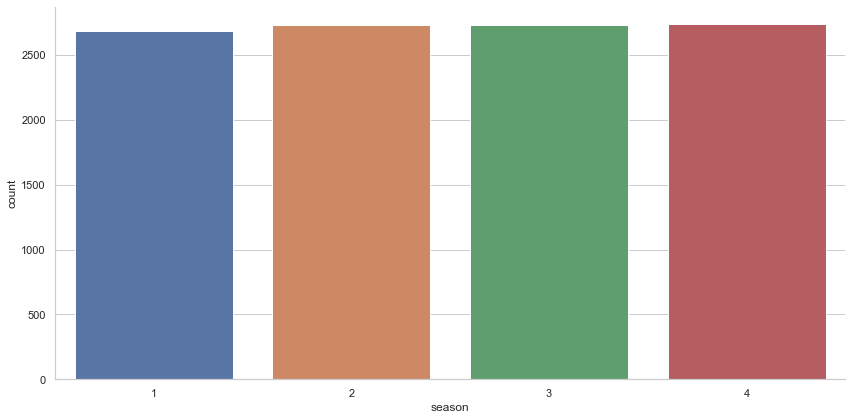

In [10]:
#Bir önceki kod ile aldığımız sezon sayım verilerini seaborn kütüphanesini kullanarak görselleştirelim.
sns.factorplot(x='season',data=df,kind='count',size=6,aspect=2)

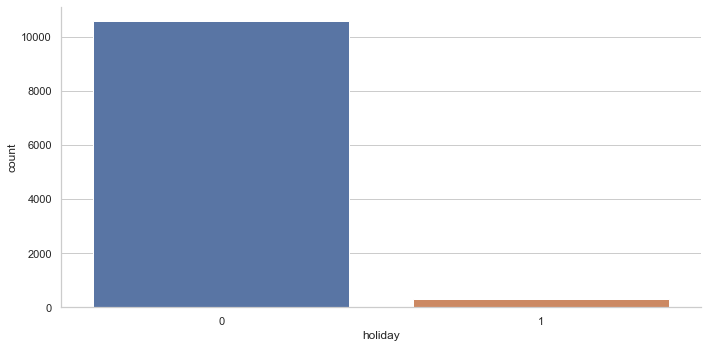

In [11]:
# Tatil Günleri (holiday)
df.holiday.value_counts()
sns.factorplot(x='holiday',data=df,kind='count',size=5,aspect=2) # Günlerin büyük bir kısmı tatil günlerini barındırmıyor.

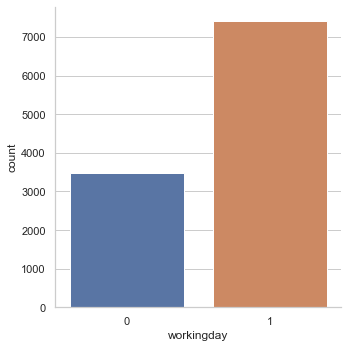

In [12]:
# İş Günleri (workingday)
df.workingday.value_counts()
sns.factorplot(x='workingday',data=df,kind='count',size=5,aspect=1) # Günlerin büyük bir kısmı çalışma günlerini barındırıyor.

In [13]:
# Hava Durumu Stunu (weather)
df.weather.value_counts()

1    7192
2    2834
3     859
4       1
Name: weather, dtype: int64

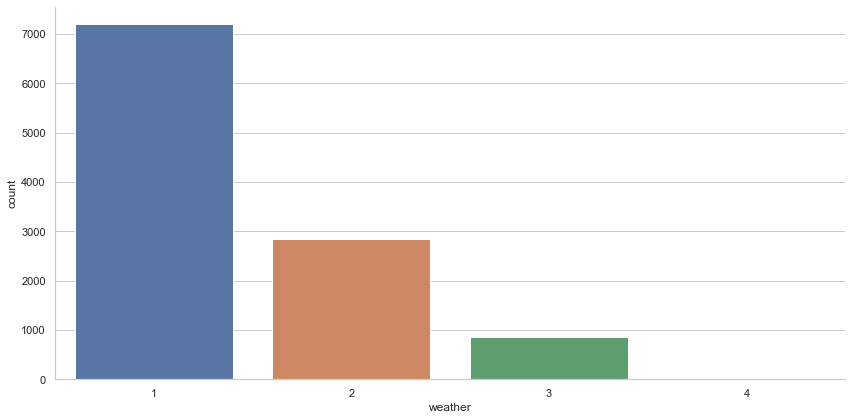

In [14]:
# Hava durumu verilerini seaborn kütüphanesini kullanarak görselleştirelim.
sns.factorplot(x='weather',data=df,kind='count',size=6,aspect=2)  
# -> 1: Açık Hava , Az bulutlu, Parçalı Bulutlu
# -> 2: Sis + Bulutlu, Sis + Parçalı Bulutlu, Sis + Az Bulutlu, Sis
# -> 3: Hafif Kar Yağışlı, Hafif Yağmur + Fırtına + Parçalı Bulutlu, Hafif Yağmur + Parçalı Bulutlu
# -> 4: Şiddetli Yağmur + Dolu + Fırtına + Yoğun Kar Yağışlı + Sis 

In [15]:
# Artık dataseti %80'e yakın tanımlayabilmiş olduk. 
# Bir sonraki adımımız (describe) komutu ile değişken stunlarımızın standart sapma, ortalama gibi dağılım verilerini almak olacaktır.

df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


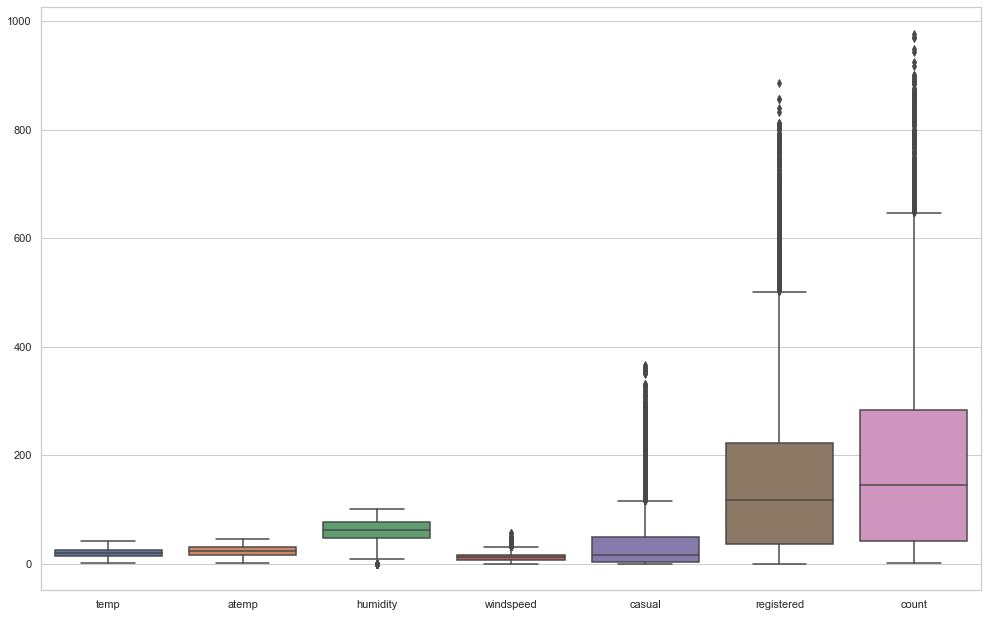

In [16]:
# Şimdi ufak bir görselleştirme daha yapalım ve bu sefer kutu (box) grafiğinden faydalanalım.
sns.boxplot(data=df[['temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']])
fig=plt.gcf()
fig.set_size_inches(15,10)

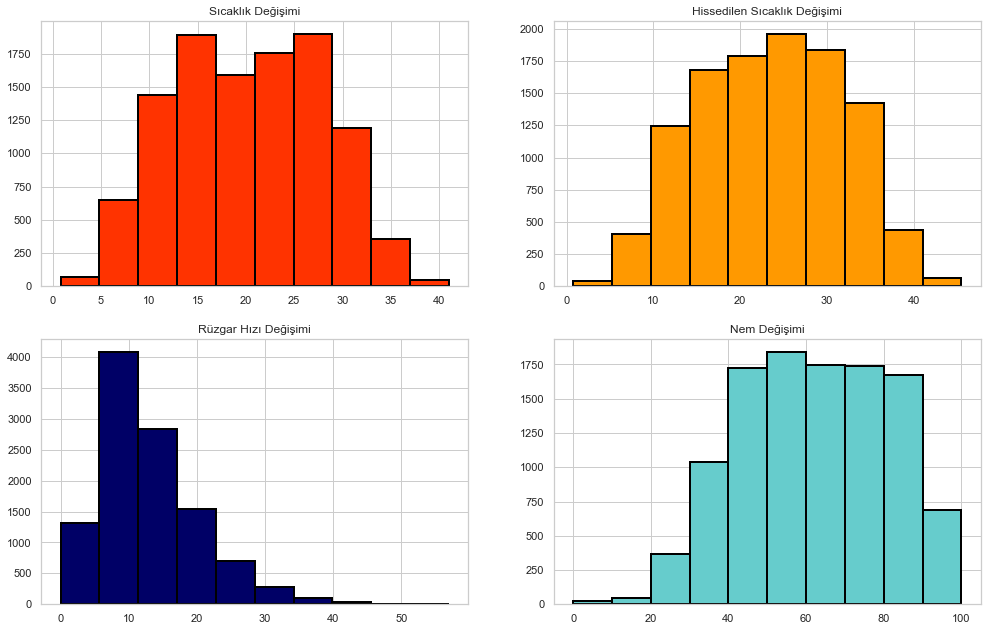

In [17]:
# Değişkenlerin her biri için ayrı ayrı histogramlar da oluşturabiliriz. 
# Veri görselleştirme bize edindiğimiz anlamlı bilgilerin daha kolay şekilde yorumlanmasına fayda sağlayacaktır.
df.temp.unique()
fig,axes=plt.subplots(2,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='#FF3300')
axes[0,0].set_title("Sıcaklık Değişimi")
axes[0,1].hist(x="atemp",data=df,edgecolor="black",linewidth=2,color='#FF9900')
axes[0,1].set_title("Hissedilen Sıcaklık Değişimi")
axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='#000066')
axes[1,0].set_title("Rüzgar Hızı Değişimi")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='#66CCCC')
axes[1,1].set_title("Nem Değişimi")
fig.set_size_inches(15,10)

<AxesSubplot:>

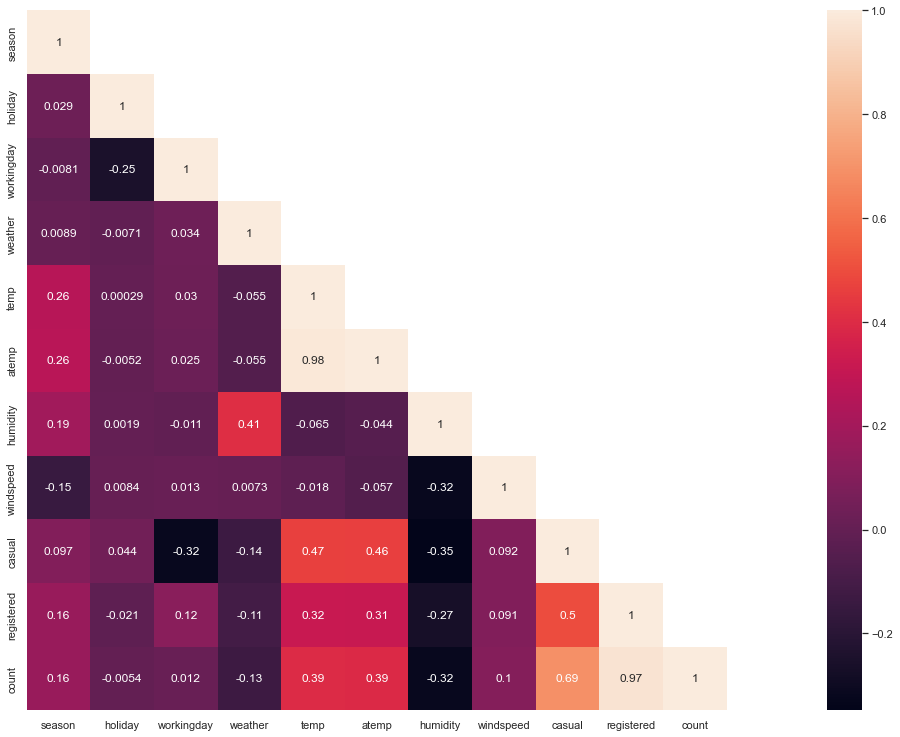

In [18]:
# Şimdi çeşitli ayrık değerleri ve sürekli değişkenlerimizin dağılımlarını gördükten, 
# sonra bir sıcaklık haritası oluşturarak değişkenlerin birbiri ile aralarındaki iletişimi görebiliriz.
# Korelasyon Matrisi oluşturduktan sonra görselleştirelim.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(32,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## <font color=Lime>  Korelasyon Matrisini Yorumlayalım  </font>
1. self realtion yani değişkenlerin birbirlerine karşılıkları 1'dir.

2. temp ve atemp beklendiği gibi oldukça ilişkilidir.

3. Hava nemli olduğu için insanlar bisikletle seyahat etmekten hoşlanmayacakları için nem beklendiği gibi count ile ters orantılıdır.

4. Ayrıca iş gününün beklediğiniz gibi büyük ölçüde ters orantılı olduğunu unutmayalım.

5. Ayrıca, count ve tatilin beklediğiniz gibi büyük ölçüde ters orantılı olduğunu unutmayalım.

6. Ayrıca, temp(veya atemp) öğesinin sayımı oldukça etkilediğini unutmayalım.

7. Ayrıca hava durumu ve sayının yüksek oranda ters orantılı olduğunu unutmayalım. Bu, hava durumu (1'den 4'e) arttıkça havanın daha da kötüleştiğini ve dolayısıyla daha az insanın bisiklet kiralayacağını ima ettiği için verileriniz için negatif yön ifade eder.

9. kayıtlı/gündelik ve sayı oldukça ilişkilidir, bu da kiralanan bisikletlerin çoğunun kayıtlı olduğunu gösterir.


#### <font color=Lime>  Artık datasetimizin ne anlam ifade ettiğini ve değişkenler arası ilişkileri %90'a yakın anlamış bulunmaktayız. Şimdi bazı **FEATURE ENGINEERING** uygulamarı ve işimize yaramayacak olan stunların düşürülmesi ile çalışmalara başlayabiliriz.  </font>

In [19]:
# Mevsim değerlerini bilgisayarımızın anlayacağı 0-1 diline çevirelim.
# Yapılan işlem literatürde " one hot encoding " olarak adlandırılmaktadır. 
season=pd.get_dummies(df['season'],prefix='season')
df=pd.concat([df,season],axis=1)
df.head()
season=pd.get_dummies(test_df['season'],prefix='season')
test_df=pd.concat([test_df,season],axis=1)
test_df.head()

# Basit bir for göndüsü ile kodumuzun kalitesini artırmış ve makinemizin çalışma hızını artırmış olduk.
# Alttaki stunlara seazon_1, seazon_2,..., gibi stunların eklendiğini görebilirsiniz.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0


In [20]:
# Şimdi aynı işlemi "weather" stununda da yapalım. 
# Bu iki stunda kategorik verilerden oluşmaktadır. 
# One Hot Encoding uygulanması gerekmektedir.
weather=pd.get_dummies(df['weather'],prefix='weather')
df=pd.concat([df,weather],axis=1)
df.head()
weather=pd.get_dummies(test_df['weather'],prefix='weather')
test_df=pd.concat([test_df,weather],axis=1)
test_df.head()

# Alttaki stunlara weather_1, weather_2,..., gibi stunların eklendiğini görebilirsiniz.

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


In [21]:
# Artık "season" ve "weather" stunlarına OHE uygulamalarını yaptık.
# Artık eski değerleri tutmamıza gerek yoktur. 
# "season" ve "weather" stunlarını (drop) komutu ile düşürebiliriz.
df.drop(['season','weather'],inplace=True,axis=1)
df.head()
test_df.drop(['season','weather'],inplace=True,axis=1)
test_df.head()
# (inplace=True) = Yapılan değişikliğin DataFrame üzerinde kalıcı olmasını sağlar.
# (axis=1) = Yapılan değişikliğin tüm stunu etkilemesini sağlar.

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0


#### <font color=Lime>  Şimdi en önemlisi günün saatinin bisiklet kiralama sayısını etkileyeceğini düşündüğümüz için tarih ve saati ayıralım ve bu işlem sonrasında daha anlamlı bir zaman serisine sahip olalım. </font>

In [22]:
df["hour"] = [t.hour for t in pd.DatetimeIndex(df.datetime)]
df["day"] = [t.dayofweek for t in pd.DatetimeIndex(df.datetime)]
df["month"] = [t.month for t in pd.DatetimeIndex(df.datetime)]
df['year'] = [t.year for t in pd.DatetimeIndex(df.datetime)]
df['year'] = df['year'].map({2011:0, 2012:1})
df.head()

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0,3,13,16,...,0,0,1,0,0,0,0,5,1,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0,8,32,40,...,0,0,1,0,0,0,1,5,1,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0,5,27,32,...,0,0,1,0,0,0,2,5,1,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0,3,10,13,...,0,0,1,0,0,0,3,5,1,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0,0,1,1,...,0,0,1,0,0,0,4,5,1,0


In [23]:
# Bu işlemin aynısını test datasetimiz için de gerçekleştirelim. 
# Datasetler arasında farklılıklar olmasını istemeyiz.
test_df["hour"] = [t.hour for t in pd.DatetimeIndex(test_df.datetime)]
test_df["day"] = [t.dayofweek for t in pd.DatetimeIndex(test_df.datetime)]
test_df["month"] = [t.month for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = [t.year for t in pd.DatetimeIndex(test_df.datetime)]
test_df['year'] = test_df['year'].map({2011:0, 2012:1})
test_df.head()


,datetime,holiday,workingday,temp,atemp,humidity,windspeed,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,2011-01-20 00:00:00,0,1,10.66,11.365,56,26.0027,1,0,0,0,1,0,0,0,0,3,1,0
1,2011-01-20 01:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,1,3,1,0
2,2011-01-20 02:00:00,0,1,10.66,13.635,56,0.0000,1,0,0,0,1,0,0,0,2,3,1,0
3,2011-01-20 03:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,3,3,1,0
4,2011-01-20 04:00:00,0,1,10.66,12.880,56,11.0014,1,0,0,0,1,0,0,0,4,3,1,0


In [24]:
# Şimdi data preprosessing işlemleri yaptığımız "datetime" stununu da düşürelim.
# DataFramemizi kontrol edebilirsiniz. 
df.drop('datetime',axis=1,inplace=True)
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,season_1,...,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,3,13,16,1,...,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,8,32,40,1,...,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,5,27,32,1,...,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,3,10,13,1,...,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,0,1,1,1,...,0,0,1,0,0,0,4,5,1,0


<AxesSubplot:>

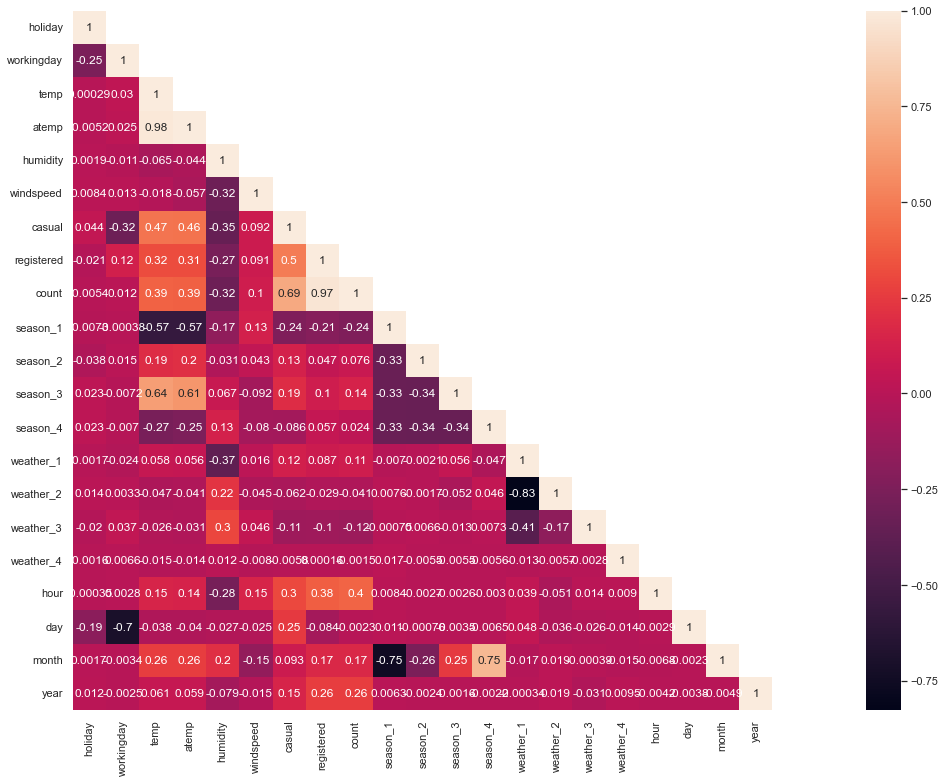

In [25]:
# Şimdi eklediğimiz yeni stunlar(değişkenler) ile tekrar bir korelasyon matrisi oluşturalım.
# One Hot Encoding, Future Engineering ve Data Preprossesing işlemlerimiz sonrası artık 21 columns'a sahibiz.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

In [26]:
# Şimdi tek bir "Y" değişkeni üzerinden ilerlemekte fayda var. Gereksiz casual ve registered stunlarını düşürelim.
df.drop(['casual','registered'],axis=1,inplace=True)

In [27]:
# Datasetimizi DataPreprosessing işlemleri ile getirdiğimiz son halini inceleyelim. 
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


## <font color=Lime>  Time Series </font>

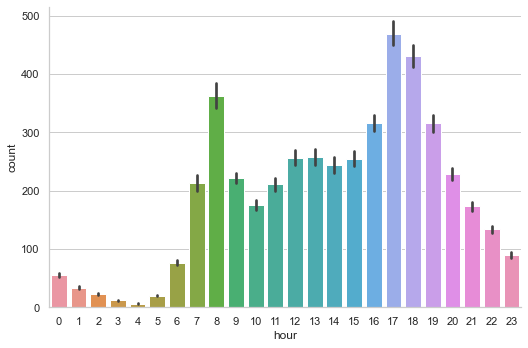

In [28]:
# Şimdi grafiğimizi saatlik olarak bar grafiğinde gösterelim.
sns.factorplot(x="hour",y="count",data=df,kind='bar',size=5,aspect=1.5)

### <font color=Lime>  Zaman Serisini Yorumlayalım </font>

1. 07:00-10:00 ve 15:00-19:00 arasında ciddi bir talep bulunuyor. 
2. Bu durum büyük metropollerde mesai başlangıç ve çıkış saatlerine örtüşür vaziyettedir.
3. Kısaca şunu söyleyebiliriz ki, bu saatler içerisinde talep daha fazladır ve bunun üzerine çalışma yapılmalıdır.

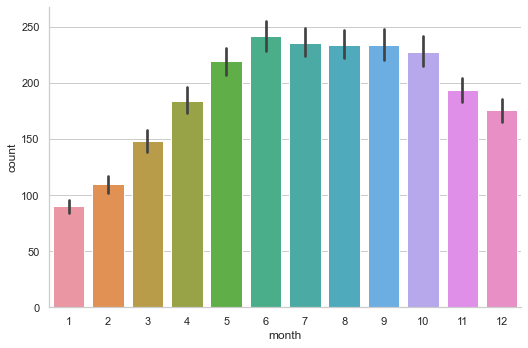

In [29]:
# Şimdi aynı değerlendirmeyi aylar için gerçekleştirelim. 
# Sonuç olarak mevsimlere göre kiralanan bisiklet sayıları fark gösterecektir.0
sns.factorplot(x="month",y="count",data=df,kind='bar',size=5,aspect=1.5)

### <font color=Lime>  Zaman Serisini Yorumlayalım </font>

1. Bariz bir şekilde görüyoruz ki bir mevsimsellik mevcuttur. 
2. Kiralanan bisiklet sayısı düzgün dağılıma uymamaktadır. 
3. Top nokta Haziran ayıdır ve dip nokta Ocak ayıdır.
4. Bu kalemler göz önünde bulundurularak çalışmalar yapılmalıdır. 

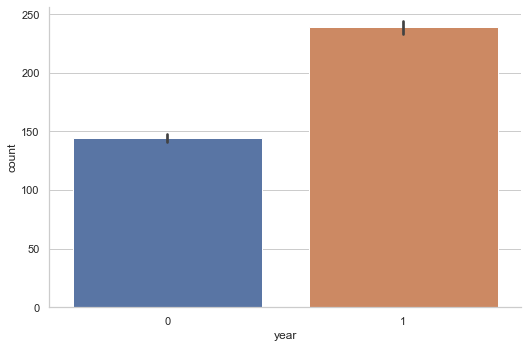

In [30]:
# Şimdi ise datasetimizin genelini YIL bazında incelleyelim. 
sns.factorplot(x="year",y="count",data=df,kind='bar',size=5,aspect=1.5)


### <font color=Lime>  Zaman Serisini Yorumlayalım </font>

1. %100'e yakın talep artışı görülmektedir.
2. 2011 ve 2012 baz alındığında 2013'ün bize daha yüksek bir talep getireceği düşünülür.
3. Bisiklet kiralama taebibi artışının sebebi araştırılmalıdır. 
4. Bu sebeb sosyolojik, popülizm veya başka bir sebepten dolayı olabilir. Bu durumda bu kalem üzerinde yoğunlaşılmalıdır.

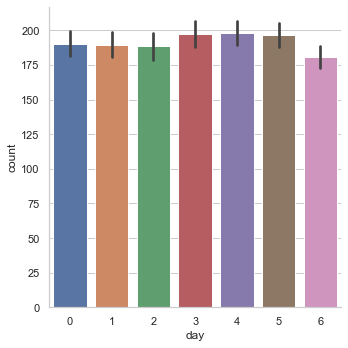

In [31]:
# Son olarak haftanın günlerini bar grafiğinde gösterelim.
sns.factorplot(x="day",y='count',kind='bar',data=df,size=5,aspect=1)

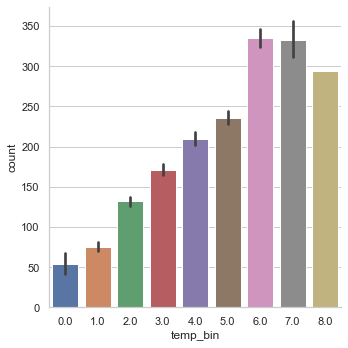

In [32]:
# Şimdi ise sıcaklık değerlerine göre bisiklet kiralama talebini görselleştirelim.
new_df=df.copy()
new_df.temp.describe()
new_df['temp_bin']=np.floor(new_df['temp'])//5
new_df['temp_bin'].unique()
sns.factorplot(x="temp_bin",y="count",data=new_df,kind='bar')

### <font color=Lime>  Zaman Serisini Yorumlayalım </font>

1. 6-7'de büyük bir talep vardır. 
2. Bu stunlar 35-40 dereceye takabül etmektedir.
3. Bu grafik bize Haziran ayındaki talep artışının sebebinin mevsimsel değil, sıcaklıktan kaynaklandığını gösterir. 
4. Bir diğer seçenek ise ülkeye gelen turist ve tatildeki öğrenciler de olabilir. 
5. Bu tarz sosyolojik etmenler incelenerek çalışma derinleştirilebilir.

# <font color=Lime>  Çalışmamızın Data Explorotıon, Data Analizi, Görselleştirmesi ve Veri Ön İşleme Çalışmaları Tamamlanmıştır.
Artık Modelleme İşlemlerine Geçebiliriz.! </font>

In [33]:
# Her şey uygun görünüyor. Artık modelleme adımlarına geçebilim.
df.head()

,holiday,workingday,temp,atemp,humidity,windspeed,count,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,hour,day,month,year
0,0,0,9.84,14.395,81,0.0,16,1,0,0,0,1,0,0,0,0,5,1,0
1,0,0,9.02,13.635,80,0.0,40,1,0,0,0,1,0,0,0,1,5,1,0
2,0,0,9.02,13.635,80,0.0,32,1,0,0,0,1,0,0,0,2,5,1,0
3,0,0,9.84,14.395,75,0.0,13,1,0,0,0,1,0,0,0,3,5,1,0
4,0,0,9.84,14.395,75,0.0,1,1,0,0,0,1,0,0,0,4,5,1,0


In [34]:
df.columns.to_series().groupby(df.dtypes).groups

{uint8: ['season_1', 'season_2', 'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3', 'weather_4'], int64: ['holiday', 'workingday', 'humidity', 'count', 'hour', 'day', 'month', 'year'], float64: ['temp', 'atemp', 'windspeed']}

In [35]:
# Kurulacak modelin Test = 0.25, Train = 0.75 olarak ayarlamıştır.
x_train,x_test,y_train,y_test=train_test_split(df.drop('count',axis=1),df['count'],test_size=0.25,random_state=42)

In [36]:
# Şimdi modellerimizi for döngüsü ile sırasıyla çalıştırıp, sonuçlarını yazalım.
# Kullanılacak algoritmalar 
# Random Forest, Ada Boost, Beggin ve K.Neigbors Regsession modelleridir. 
models=[RandomForestRegressor(),AdaBoostRegressor(),BaggingRegressor(),KNeighborsRegressor()]
model_names=['RandomForestRegressor','AdaBoostRegressor','BaggingRegressor','KNeighborsRegressor']
rmsle=[]
d={}
for model in range (len(models)):
    clf=models[model]
    clf.fit(x_train,y_train)
    test_pred=clf.predict(x_test)
    rmsle.append(np.sqrt(mean_squared_log_error(test_pred,y_test)))
d={'Modelling Algo':model_names,'RMSLE':rmsle}   
d
    

{'Modelling Algo': ['RandomForestRegressor',
  'AdaBoostRegressor',
  'BaggingRegressor',
  'KNeighborsRegressor'],
 'RMSLE': [0.3188961321204794,
  1.0163098573548173,
  0.33011599012667003,
  0.8603155168503474]}

In [37]:
# Şimdi ise modellerimizden aldığımız karakök ortalamalı logaritmik hataları basit bir dataframe üzerinde gösterelim.
rmsle_frame=pd.DataFrame(d)
rmsle_frame

,Modelling Algo,RMSLE
0,RandomForestRegressor,0.318896
1,AdaBoostRegressor,1.016310
2,BaggingRegressor,0.330116
3,KNeighborsRegressor,0.860316


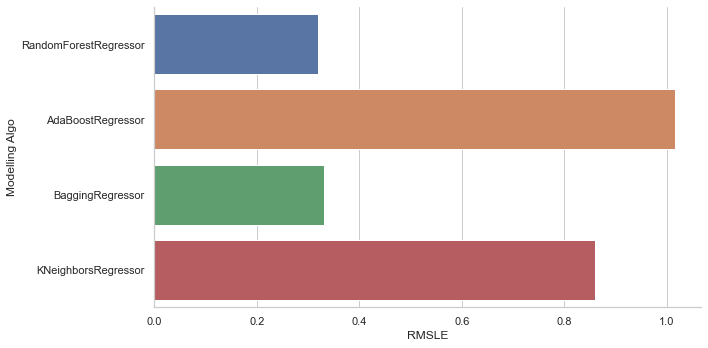

In [38]:
# Şimdi ise RMSLE değerlerimizi görselleştirerek okuyalım.
plot = sns.factorplot(y='Modelling Algo',x='RMSLE',data=rmsle_frame,kind='bar',size=5,aspect=2)

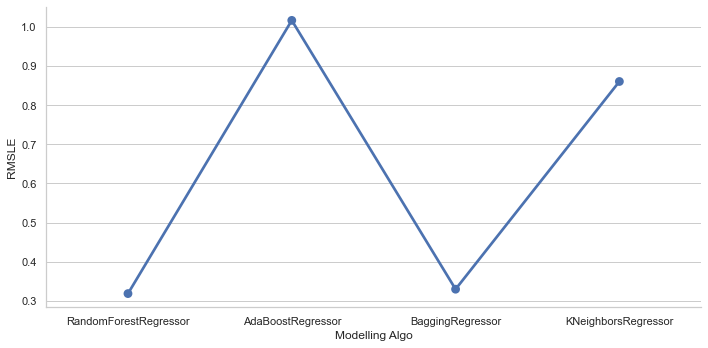

In [39]:
# Şimdi ise bir çizgi grafiği üzerinde RMSLE değerlerimizi gösterelim. 
# Devam edeceğimiz ve tahminleme yapacağımız modeli seçelim.
plot1 = sns.factorplot(x='Modelling Algo',y='RMSLE',data=rmsle_frame,kind='point',size=5,aspect=2)

In [40]:
# Önceki kurduğumuz algoritmalara daha öncesinde Support Vector Regression algoritmasını da eklemiştim.
# Ancak modeller count yani hedef değişken üzerinde negatif tahminlemelerde bulunmuştu bu yüzden kaldırmıştım. 
# Bu durum Randoom Forest Regression algoritmasında da olabileceğini düşünüyorum. 
# Bu yüzden negatif talep tahminlerinin önüne geçmek ve RMSLE değerimizi daha da 0'a yaklaştırmak adına bir çalışma yapmamız gerekecek.
no_of_test=[500]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_features':["auto",'sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='neg_mean_squared_log_error')
clf_rf.fit(x_train,y_train)
pred=clf_rf.predict(x_test)
print((np.sqrt(mean_squared_log_error(pred,y_test))))

0.3195144094060859


In [41]:
# Artık görüldüğü gibi RMSLE değerimizi en küçük veren algoritma Random Forest Regression Algoritmasıdır. 
# Bu durumda 0.31 Karakök Ortalamalı Logaritmik Hataya sahip Random Forest Regression algoritmasını talep tahminlemede kullanabiliriz.
# Kullancağımız algritmayı tarih ve talep sayılarını içeren bir csv dosyasına kaydederek devam edelim.

pred=clf_rf.predict(test_df.drop('datetime',axis=1))
d={'datetime':test['datetime'],'count':pred}
ans=pd.DataFrame(d)
ans.to_csv('answer.csv',index=False)